In [70]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [71]:
df_data_original =pd.read_csv("DATA.CSV",index_col=0)
df_data_original.head(2).T

,0,1
Age,51,52
Attrition,No,No
BusinessTravel,NaN,NaN
DailyRate,"684,0$","699,0$"
Department,NaN,NaN
DistanceFromHome,6,1
Education,3,4
EducationField,NaN,Life Sciences
employeecount,1,1
employeenumber,"162,0","259,0"


# 1.Homogeneización del nombre de las columnas (en minúsculas)

In [72]:
df_data_copy= df_data_original.copy()

In [73]:
df_data_copy.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


In [74]:
nuevas_columnas={columna:columna.lower() for columna in df_data_copy} #modificamos las columnas a minúsculas
df_data_copy.rename(columns= nuevas_columnas, inplace= True) #cambiamos las columnas antiguas por las homogeneizadas en el paso anterior (nuevas_columnas)

# 2. Limpieza y verificación de datos
- 2.1 Modificar columnas categóricas a numéricas
- 2.2 Homogeneizar las etiquetas de las columnas categóricas
- 2.3 Modificar valores erróneos a nulos
- 2.4 Creación de nuevas columnas
- 2.5 Duplicados
- 2.6 Nulos
- 2.7 Eliminar columnas
- 2.8 Verificación de categorías
- 2.9 Análisis de registros para el mismo empleado (mismo employeenumber)

#### 2.1 Cambiar de strings (objeto) a numéricas

In [75]:
#____STRING A INT_________
#age:               12 valores en letras: cambiarlos a nros + convertir todos los nros a int.
#worklifebalance quitar ",0" y convertir a int.

#____STRING A FLOAT_________
#totalworkingyears: cambiar comas por puntos
#daily rate (comas por puntos y quitarle el símbolo del dolar)
#hourly rate
#monthlyincome
#monthlyrate

In [76]:
#Age:
def texto_nro(cadena):
    cadena = cadena.replace("twenty-six","26").replace("twenty-four","24").replace("thirty-two","32").replace("thirty-six","36").replace("thirty-seven","37").replace("thirty-one","31").replace("thirty","30").replace("forty-seven","47").replace("fifty-two","52").replace("fifty-five","55").replace("fifty-eight","58")
    return int(cadena)

df_data_copy["age"] = df_data_copy["age"].apply(texto_nro)


In [77]:
#employeenumber

In [78]:
df_data_copy["employeenumber"].isnull().sum()

431

In [79]:
df_data_copy["employeenumber"]

0       162,0
1       259,0
2       319,0
3         NaN
4         NaN
        ...  
1609    967,0
1610    972,0
1611      NaN
1612    990,0
1613      NaN
Name: employeenumber, Length: 1614, dtype: object

In [80]:
#Worklifebalance y employeenumber

def nro(cadena):

    try: 
        cadena = cadena.replace(",0","")
        return float(cadena)
    
    except: 
        return np.nan #tiene varios valores que son "nan"

df_data_copy["worklifebalance"] = df_data_copy["worklifebalance"].apply(nro)

In [81]:
df_data_copy["employeenumber"] = df_data_copy["employeenumber"].apply(nro)

In [82]:
#dailyrate 
def daily(nro):
    try:
        return float(nro.replace(",0$",""))
    except:
        return np.nan

df_data_copy["dailyrate"] = df_data_copy["dailyrate"].apply(daily)

In [83]:
# totalworkingyears", "monthlyincome", "monthlyrate: Cambio de string a float

def decimal(cadena):

    try: 
        return float(cadena.replace(",",".").replace("$","."))

    except: 
        return np.nan #tiene varios valores que son "nan"
    
columnas_decimal = ["totalworkingyears", "monthlyincome"]

for columna in columnas_decimal:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal)

In [84]:
# "hourlyrate", "monthlyrate" : cambio de string a float - no tienen decimales

def decimal3(cadena):
    try:
        return float(cadena)
    except:
        return np.nan

col_dec_ent = ["hourlyrate", "monthlyrate"]

for columna in col_dec_ent:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal3)

In [85]:
## Nota: hourlyrate - parecía en el original como si no hubiese nulos pero había algunos que eran "Not available" y q contaban como interger

#### 2.2 Homogeneizar categóricas

In [86]:
#Columnas a homogeneizar sus categorías:
# educationfield (minúsculas)
# jobrole (minúsculas)
# maritalstatus(minúsculas y homogeneización)

def homogeneizar(cadena):
    try:
        return cadena.lower().replace("marreid","married")
    except:
        return np.nan

col_homo = ["educationfield", "jobrole", "maritalstatus"]

for columna in col_homo:
    df_data_copy[columna] = df_data_copy[columna].apply(homogeneizar)

In [87]:
# Homogeneizar "remotework" a 2 opciones: Yes, No
df_data_copy["remotework"] = df_data_copy["remotework"].replace({"True": "Yes", 'False': "No", '0': "No", '1': "Yes"})

In [88]:
len(df_data_copy[df_data_copy["distancefromhome"]<0])

192

#### 2.3 Modificar valores erróneos a nulos

In [89]:
#Distancefromhome - Valores negativos (192 valores) a nulos
def convertir_nulos(numero):
    if numero < 0:
        return np.nan
    else:
        return numero

df_data_copy["distancefromhome"] = df_data_copy["distancefromhome"].apply(convertir_nulos)

In [90]:
#Environmentalsatisfaction: modificar valores diferentes a 1-4 a nulos
def convertir_nulos (numero):
    if numero == 1:
        return numero
    elif numero == 2: 
        return numero
    elif numero == 3:
        return numero
    elif numero == 4:
        return numero
    else:
        return np.nan

#Creación de una columna con la función
df_data_copy["environmentsatisfaction"] = df_data_copy["environmentsatisfaction"].apply(convertir_nulos)

#### 2.4 Creación de nuevas columnas

In [91]:
#1. GÉNERO

#Creamos la función 
def categorizar_gender (numero):
    if numero == 0:
        return 'male'
    else:
        return 'female'

In [92]:
#Creación de una columna con la función
df_data_copy.insert(12, 'gender_cat', df_data_copy["gender"].apply(categorizar_gender))

In [93]:
#2. environmentsatisfaction,relationshipsatisfaction,worklifebalance

def categorizar_environmentsatisfaction(valor):

    if valor == 4:
        return "maximun"
    elif valor == 3:
        return "medium"
    elif valor == 2:
        return "little"
    elif valor == 1:
        return "nothing"
    else:
        return "unknown"

#df_data_copy["environmentsatisfaction_cat"] = df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["relationshipsatisfaction_cat"] = df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["worklifebalance_cat"] = df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction)

In [94]:
df_data_copy.insert(11, 'environmentsatisfaction_cat', df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction))

In [95]:
df_data_copy.insert(28, 'relationshipsatisfaction_cat', df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction))

In [96]:
df_data_copy.insert(34, 'worklifebalance_cat', df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction))


In [97]:
#education
def categorizar_education(valor):
    if valor == 5:
        return "university"
    elif valor == 3:
        return "college"
    elif valor == 2:
        return "high school"
    elif valor == 1:
        return "middle school"
    else:
        return "Unknown"

In [98]:
df_data_copy.insert(7, 'education_cat', df_data_copy["education"].apply(categorizar_education))

In [99]:
#"jobinvolvement"

def categorizar_jobinvolvement(valor):
    if valor == 4:
        return "very involved"
    elif valor == 3:
        return "involved"
    elif valor == 2:
        return "little involved"
    elif valor == 1:
        return "not involved"
    else:
        return "Unknown"

In [100]:
df_data_copy.insert(17, 'jobinvolvement_cat', df_data_copy["jobinvolvement"].apply(categorizar_jobinvolvement))

#### 2.5 Duplicados (filas)

In [101]:
#Nro. de duplicados (todas las filas son iguales)
df_data_copy.duplicated().sum()

43

In [102]:
#eliminar duplicados
df_data_copy = df_data_copy.drop_duplicates()
print("Cantidad de filas después de eliminar duplicados:", len(df_data_copy))

Cantidad de filas después de eliminar duplicados: 1571


#### 2.6 Nulos

In [103]:
#1.CATEGÓRICAS - Ana
# businesstravel
# department - muchos nulos
# education field
# marital status - 119
# overtime
# performancerating - 195 nulos
# Role in department - muchos nulos

In [104]:
#Lsta de columnas categoricas con nulos
nulos_esta_cat = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['businesstravel', 'department', 'educationfield', 'maritalstatus',
       'over18', 'overtime', 'performancerating', 'standardhours',
       'yearsincurrentrole', 'sameasmonthlyincome', 'roledepartament'],
      dtype='object')


In [105]:
df_data_copy.isnull().sum()

age                                0
attrition                          0
businesstravel                   752
dailyrate                        121
department                      1269
distancefromhome                 192
education                          0
education_cat                      0
educationfield                   730
employeecount                      0
employeenumber                   415
environmentsatisfaction          100
environmentsatisfaction_cat        0
gender                             0
gender_cat                         0
hourlyrate                        84
jobinvolvement                     0
jobinvolvement_cat                 0
joblevel                           0
jobrole                            0
jobsatisfaction                    0
maritalstatus                    638
monthlyincome                    824
monthlyrate                        0
numcompaniesworked                 0
over18                           877
overtime                         659
p

In [106]:
# El 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_data_copy[col].value_counts() / df_data_copy.shape[0])
    print("........................")

La distribución de las categorías para la columna BUSINESSTRAVEL


travel_rarely        0.364736
travel_frequently    0.099300
non-travel           0.057288
Name: businesstravel, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


 Research & Development     0.124761
 Sales                      0.057925
 Human Resources            0.009548
Name: department, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


life sciences       0.214513
medical             0.171229
marketing           0.064290
technical degree    0.042648
other               0.035010
human resources     0.007638
Name: educationfield, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


married     0.267346
single      0.201782
divorced    0.124761
Name: maritalstatus, dtype: float64

........................
La distribución de las categorías para la columna OVER18


Y    0.441757
Name: over18, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


No     0.420751
Yes    0.159771
Name: overtime, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


3,0    0.745385
4,0    0.133673
Name: performancerating, dtype: float64

........................
La distribución de las categorías para la columna STANDARDHOURS


80,0    0.26098
Name: standardhours, dtype: float64

........................
La distribución de las categorías para la columna YEARSINCURRENTROLE


2,0     0.006365
7,0     0.002546
0,0     0.002546
4,0     0.001910
1,0     0.001910
11,0    0.001273
6,0     0.001273
3,0     0.001273
13,0    0.000637
12,0    0.000637
Name: yearsincurrentrole, dtype: float64

........................
La distribución de las categorías para la columna SAMEASMONTHLYINCOME


6347,0     0.002546
5304,0     0.002546
2657,0     0.001910
8392,0     0.001273
7756,0     0.001273
             ...   
5368,0     0.000637
12936,0    0.000637
4221,0     0.000637
4963,0     0.000637
19431,0    0.000637
Name: sameasmonthlyincome, Length: 668, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


 MaNAgeR  -  Sales                                        0.001273
 ManaGER  -  Research & Development                       0.000637
 ReseaRch scIENTisT  -  Research & Development            0.000637
 ManufacTURInG DIRECtOR  -  Research & Development        0.000637
 hEalthCaRe reprEseNTaTiVe  -  Research & Development     0.000637
                                                            ...   
 saLES eXEcUTiVE  -  Sales                                0.000637
 mANUfacTURiNG dIRectOR  -  Research & Development        0.000637
 huMAn ResOurces  -  Human Resources                      0.000637
 HUMAN ResoURCeS  -  Human Resources                      0.000637
 sAleS EXECUtIvE  -  Sales                                0.000637
Name: roledepartament, Length: 301, dtype: float64

........................


Performance rating es la única que tendría posibilidades de cambiar a la moda, las otras tienen valores muy bajos y seria convenientes cmabiar por desconocido. 

In [107]:
#columnas_moda = ['performancerating']
columnas_desconocido = ['businesstravel', 'department', 'educationfield','maritalstatus','overtime']

In [108]:
#Columna moda
# for columna in columnas_moda:
#     moda = df_data_copy[col].mode()[0]    
#     df_data_copy[columna] = df_data_copy[columna].fillna(moda)

# print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
# df_data_copy[columnas_moda].isnull().sum()

In [109]:
#columna desconocido
for columna in columnas_desconocido:
    df_data_copy[columna] = df_data_copy[columna].fillna("Unknown") 

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_data_copy[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


businesstravel    0
department        0
educationfield    0
maritalstatus     0
overtime          0
dtype: int64

In [110]:
#2.NUMÉRICAS - Elena
# hourly_rate = 84 nulos
# Environmental satisfaction 
# monthlyincome
# worklifebalance - 108
# totalworkingyears
# numberofchildren

In [111]:
#Columnas numéricas con nulos 
nulos_num = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)

Index(['dailyrate', 'distancefromhome', 'employeenumber',
       'environmentsatisfaction', 'hourlyrate', 'monthlyincome',
       'totalworkingyears', 'worklifebalance', 'numberchildren'],
      dtype='object')


In [112]:
#% de nulos en las columnas numéricas con nulos
nl = (df_data_copy[nulos_num].isnull().sum() / df_data_copy.shape[0]) * 100
#nl.sort_values(ascending=False).reset_index()
nl.reset_index()

,index,0
0,dailyrate,7.702101
1,distancefromhome,12.221515
2,employeenumber,26.416295
3,environmentsatisfaction,6.365372
4,hourlyrate,5.346913
5,monthlyincome,52.450668
6,totalworkingyears,32.590707
7,worklifebalance,6.619987
8,numberchildren,100.000000


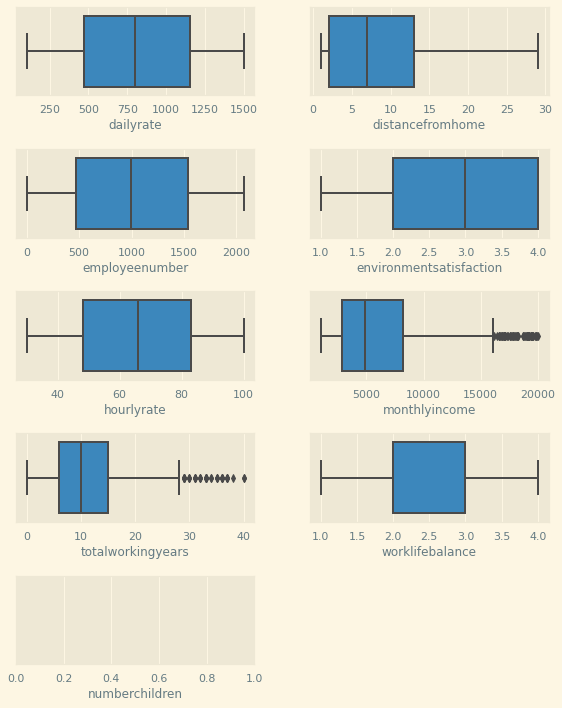

In [113]:
#Valores atípicos
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x = col, data = df_data_copy, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

#### Decisiones: Nulos (numéricas)
- Number of children: borrarla
- Monthly income: borrarla. Tiene 52% de nulos
- Todas las demás: utilizar el iterate y knn imputer - atípicos en totalworkingyears

In [114]:
#ITERATIVE IMPUTER

imputer_iterative = IterativeImputer(max_iter =20, random_state=42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate','totalworkingyears', 'worklifebalance']])
imputer_iterative_imputado

array([[ 1.        , 51.        , 11.26295761,  3.        ],
       [ 3.        , 65.        , 34.        ,  3.        ],
       [ 3.        , 58.        , 22.        ,  2.76440272],
       ...,
       [ 3.        , 57.        , 11.26615594,  2.        ],
       [ 2.80337015, 41.        ,  9.        ,  3.        ],
       [ 4.        , 75.        , 11.27550094,  3.        ]])

In [115]:
df_data_copy[['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo']] = imputer_iterative_imputado

In [116]:
#KNN IMPUTER
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate', 'totalworkingyears', 'worklifebalance']])
imputer_knn_imputado

array([[ 1. , 51. ,  8.8,  3. ],
       [ 3. , 65. , 34. ,  3. ],
       [ 3. , 58. , 22. ,  3.4],
       ...,
       [ 3. , 57. ,  6.8,  2. ],
       [ 3.8, 41. ,  9. ,  3. ],
       [ 4. , 75. ,  9. ,  3. ]])

In [117]:
df_data_copy[['environmentsatisfaction_knn', 'hourlyrate_knn', 'totalworkingyears_knn', 'worklifebalance_knn']] = imputer_knn_imputado

In [118]:
#Comparamos las estadísticas generadas de por el iterative y el knn para decidir cuál coger (aquel cuya media y mediana sea más parecida a la original- En la columna con valores atípicos cogemos aquel cuya mediana sea más parecida a la original)
df_data_copy.describe()[['environmentsatisfaction', 'environmentsatisfaction_iterativo', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_iterativo', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_iterativo', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_iterativo', 'worklifebalance_knn']].T

,count,mean,std,min,25%,50%,75%,max
environmentsatisfaction,1471.0,2.716519,1.096311,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_iterativo,1571.0,2.716667,1.060951,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_knn,1571.0,2.733927,1.072951,1.0,2.0,3.000000,4.000000,4.0
hourlyrate,1487.0,65.990585,20.188310,30.0,48.0,66.000000,83.000000,100.0
hourlyrate_iterativo,1571.0,65.981689,19.642171,30.0,49.0,66.000000,83.000000,100.0
hourlyrate_knn,1571.0,66.084405,19.709073,30.0,49.0,66.000000,83.000000,100.0
totalworkingyears,1059.0,11.271010,7.658793,0.0,6.0,10.000000,15.000000,40.0
totalworkingyears_iterativo,1571.0,11.270789,6.287145,0.0,8.0,11.260424,11.286904,40.0
totalworkingyears_knn,1571.0,10.795672,6.563577,0.0,6.6,9.800000,13.000000,40.0
worklifebalance,1467.0,2.762100,0.707576,1.0,2.0,3.000000,3.000000,4.0


### Cuál coger?
- env.satif_iterativo
- hourlyrate_iterativo
- totalworkingyears_iterativo
- worklifebalance_iterativo

In [119]:
df_data_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [120]:
#Quitamos las columnas originales y las de aquellos métodos q están más alejados de la media y medianas de las originales
df_data_copy.drop(['environmentsatisfaction', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_knn'], axis = 1, inplace = True)

In [121]:
nuevas_columnas = {'age': 'age', 'attrition': 'attrition', 'businesstravel': 'businesstravel', 
                    'dailyrate': 'dailyrate', 'department': 'department', 
                    'distancefromhome': 'distancefromhome', 'education': 'education', 
                    'education_cat': 'education_cat', 'educationfield': 'educationfield', 
                    'employeecount': 'employeecount', 'employeenumber': 'employeenumber', 
                    'environmentsatisfaction_cat': 'environmentsatisfaction_cat', 'gender': 'gender', 
                    'gender_cat': 'gender_cat', 'jobinvolvement': 'jobinvolvement', 
                    'jobinvolvement_cat': 'jobinvolvement_cat', 'joblevel': 'joblevel', 
                    'jobrole': 'jobrole', 'jobsatisfaction': 'jobsatisfaction', 
                    'maritalstatus': 'maritalstatus', 'monthlyrate': 'monthlyrate', 
                    'numcompaniesworked': 'numcompaniesworked', 'over18': 'over18', 
                    'overtime': 'overtime', 'percentsalaryhike': 'percentsalaryhike', 
                    'performancerating': 'performancerating', 
                    'relationshipsatisfaction': 'relationshipsatisfaction', 
                    'relationshipsatisfaction_cat': 'relationshipsatisfaction_cat', 
                    'standardhours': 'standardhours', 'stockoptionlevel': 'stockoptionlevel', 
                    'trainingtimeslastyear': 'trainingtimeslastyear', 
                    'worklifebalance_cat': 'worklifebalance_cat', 'yearsatcompany': 'yearsatcompany', 
                    'yearsincurrentrole': 'yearsincurrentrole', 
                    'yearssincelastpromotion': 'yearssincelastpromotion', 
                    'yearswithcurrmanager': 'yearswithcurrmanager', 
                    'sameasmonthlyincome': 'sameasmonthlyincome', 
                    'datebirth': 'datebirth', 'salary': 'salary', 
                    'roledepartament': 'roledepartament', 'numberchildren': 'numberchildren', 
                    'remotework': 'remotework', 
                    'environmentsatisfaction_iterativo': 'environmentsatisfaction', 
                    'hourlyrate_iterativo': 'hourlyrate', 
                    'totalworkingyears_iterativo': 'totalworkingyears', 
                    'worklifebalance_iterativo': 'worklifebalance'}

In [122]:
df_data_copy.rename(columns = nuevas_columnas, inplace = True)

In [123]:
#NOTA: Para crear las columnas de iterativo y de knn automáticamente

#---------------ITERATIVE-----------------------------------
# palabras = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_iterativo' for palabra in palabras]

# print(palabras_iterativas)

# #---------------KNN-----------------------------------

# palabras2 = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_knn' for palabra in palabras2]

# print(palabras_iterativas)

# #---------------TODAS JUNTAS-----------------------------------

# pal = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# pal2 = ['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'monthlyincome_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo', 'numberchildren_iterativo']


# pal3 = ['environmentsatisfaction_knn', 'hourlyrate_knn', 'monthlyincome_knn', 'totalworkingyears_knn', 'worklifebalance_knn', 'numberchildren_knn']


# lista_concatenada = [item for sublist in zip(pal, pal2, pal3) for item in sublist]

# print(lista_concatenada)

#### 2.7 Eliminar columnas

In [124]:
# -Numberofchildren
# - over18
# - datebirth - No aporta nada nuevo ya que tenemos una columna con la edad
# - salary - sólo un valor para todos
# - sameasmontlyincome - copia de columna "monthly income"
# - monthlyincome - muchos nulos 52%
# - standardhours
# - employeecount
# - roledepartment
# - performancerating
# - years in currentrole

In [125]:
columnas_drop = ["numberchildren", "over18","datebirth","salary","sameasmonthlyincome", "monthlyincome","standardhours","employeecount", "performancerating", "yearsincurrentrole", "roledepartament"]

In [126]:
df_data_copy.drop(columns = columnas_drop, axis=1, inplace=True)

In [127]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'environmentsatisfaction', 'hourlyrate', 'totalworkingyears',
       'worklifebalance'],
      dtype='object')

#### 2.8 Verificación de clasificaciones categóricas
- education (1 menos y 5 más educación)
    Parece que es así pero hay personas con un nivel "1" de educación que son directores y managers y tb 1 q tienenn altos "hourlyrates"

- jobinvolvement (1 menos y 4 máximo) -  a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- jobsatisfaction (1 mínimo y 4 máximo) - a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- joblevel (1 mínimo y 5 máximo) - a priori
    Sí, el 1 son técnicos el 5 son managers, directores

- relationshiptsatisfaction (1 mínimo y 4 máximo) - a priori
    No guarda una relación directa con otras columnas

- stockoption (0 sin opciones y 1-3 de pocas acciones a muchas) - a priori
No guarda una relación directa con otras columnas. Hay empleados q llevan 0 años trabjando y tienen el nivel 3 de opciones. y tampoco por el tipo de posición hay relación

- workinglifebalance (1 mínimo -4 máximo) -a prioru
tampoco existe relación directa con otras columnas

In [128]:
#relationshipsatisfaction

In [129]:
#df_data_copy[["education","educationfield","age","joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany"]].sort_values(by = "hourlyrate", ascending=False).head(50)

In [130]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobinvolvement", ascending=False).tail(50)

In [131]:
#df_data_copy[["joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany","education","educationfield","age"]].sort_values(by = "joblevel", ascending=False).head(50)

In [132]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobsatisfaction", ascending=False).tail(50)

In [133]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "relationshipsatisfaction", ascending=False).head(50)

In [134]:
#df_data_copy[["stockoptionlevel", "yearsatcompany","totalworkingyears","joblevel","jobrole"]].sort_values(by = "stockoptionlevel", ascending=False).head(50)

In [135]:
#df_data_copy[["worklifebalance","jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "worklifebalance", ascending=False).head(50)

#### 2.9 Análisis de registros para mismo empleado (con el mismo employee number)

In [136]:
#Empleados q están varias veces en la base de datos con valores modificados (ej. cambio en distancia al trabajo, en trabajo remoto, etc)
df_data_copy["employeenumber"].duplicated().sum()

491

In [137]:
df_empleados = df_data_copy[df_data_copy.duplicated(subset = 'employeenumber', keep=False)].sort_values(by = 'employeenumber', ascending=False).head(50)

2.10. Generación de csv

In [138]:
#df_data_copy.to_csv("test.csv")

In [139]:
#test = pd.read_csv("test.csv")

In [140]:
#test.columns

In [141]:
df_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1613
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1571 non-null   int64  
 1   attrition                     1571 non-null   object 
 2   businesstravel                1571 non-null   object 
 3   dailyrate                     1450 non-null   float64
 4   department                    1571 non-null   object 
 5   distancefromhome              1379 non-null   float64
 6   education                     1571 non-null   int64  
 7   education_cat                 1571 non-null   object 
 8   educationfield                1571 non-null   object 
 9   employeenumber                1156 non-null   float64
 10  environmentsatisfaction_cat   1571 non-null   object 
 11  gender                        1571 non-null   int64  
 12  gender_cat                    1571 non-null   object 
 13  job

# 3. Inserción de datos

# 4. Recomendaciones

- Añadir info sobre el número de hijos, respetando la privacidad del empleado
- Añadir información completa sobre "monthly income" - solamente disponíamos del 48% de los datos

In [143]:
df_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1613
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1571 non-null   int64  
 1   attrition                     1571 non-null   object 
 2   businesstravel                1571 non-null   object 
 3   dailyrate                     1450 non-null   float64
 4   department                    1571 non-null   object 
 5   distancefromhome              1379 non-null   float64
 6   education                     1571 non-null   int64  
 7   education_cat                 1571 non-null   object 
 8   educationfield                1571 non-null   object 
 9   employeenumber                1156 non-null   float64
 10  environmentsatisfaction_cat   1571 non-null   object 
 11  gender                        1571 non-null   int64  
 12  gender_cat                    1571 non-null   object 
 13  job